<a href="https://colab.research.google.com/github/manjulamishra/DS-Sprint-02-Storytelling-With-Data/blob/master/DS_Unit_1_Sprint_Challenge_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 2

# Storytelling with Data

In this sprint challenge you'll work with a dataset from **FiveThirtyEight's article, [Every Guest Jon Stewart Ever Had On ‘The Daily Show’](https://fivethirtyeight.com/features/every-guest-jon-stewart-ever-had-on-the-daily-show/)**!

# Part 0 — Run this starter code

You don't need to add or change anything here. Just run this cell and it loads the data for you, into a dataframe named `df`.

(You can explore the data if you want, but it's not required to pass the Sprint Challenge.)

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/daily-show-guests/daily_show_guests.csv')
df.rename(columns={'YEAR': 'Year', 'Raw_Guest_List': 'Guest'}, inplace=True)

def get_occupation(group):
    if group in ['Acting', 'Comedy', 'Musician']:
        return 'Acting, Comedy & Music'
    elif group in ['Media', 'media']:
        return 'Media'
    elif group in ['Government', 'Politician', 'Political Aide']:
        return 'Government and Politics'
    else:
        return 'Other'
      
df['Occupation'] = df['Group'].apply(get_occupation)

# Part 1 — What's the breakdown of guests’ occupations per year?

For example, in 1999, what percentage of guests were actors, comedians, or musicians? What percentage were in the media? What percentage were in politics? What percentage were from another occupation?

Then, what about in 2000? In 2001? And so on, up through 2015.

So, **for each year of _The Daily Show_, calculate the percentage of guests from each occupation:**
- Acting, Comedy & Music
- Government and Politics
- Media
- Other

#### Hints:
1. Use pandas to make a **crosstab** of **`Year`** & **`Occupation`**. ([This documentation](http://pandas.pydata.org/pandas-docs/stable/reshaping.html#cross-tabulations) has examples and explanation.)
2. To get percentages instead of counts, use crosstab's **`normalize`** parameter to normalize over each _row._ ([This documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.crosstab.html) describes the parameter and its options.)
3. You'll know you've calculated the crosstab correctly when the percentage of "Acting, Comedy & Music" guests is 90.36% in 1999, and 45% in 2015.

In [66]:
df.shape

(2693, 6)

In [67]:
df.head(5)

,Year,GoogleKnowlege_Occupation,Show,Group,Guest,Occupation
0,1999,actor,1/11/99,Acting,Michael J. Fox,"Acting, Comedy & Music"
1,1999,Comedian,1/12/99,Comedy,Sandra Bernhard,"Acting, Comedy & Music"
2,1999,television actress,1/13/99,Acting,Tracey Ullman,"Acting, Comedy & Music"
3,1999,film actress,1/14/99,Acting,Gillian Anderson,"Acting, Comedy & Music"
4,1999,actor,1/18/99,Acting,David Alan Grier,"Acting, Comedy & Music"


In [68]:
df.Occupation.value_counts()

Acting, Comedy & Music     1203
Media                       756
Government and Politics     384
Other                       350
Name: Occupation, dtype: int64


###Use pandas to make a crosstab of Year & Occupation. (This documentation has examples and explanation.)

In [34]:
pd.crosstab(df['Year'], df['Occupation'])

Occupation,"Acting, Comedy & Music",Government and Politics,Media,Other
Year,,,,
1999,150,2,11,3
2000,125,14,21,9
2001,114,6,31,6
2002,99,11,42,7
2003,93,17,41,15
2004,63,37,45,19
2005,60,26,54,22
2006,58,31,47,25
2007,36,24,47,34


####To get percentages instead of counts, use crosstab's normalize parameter to normalize over each row. (This documentation describes the parameter and its options.)
For example, in 1999, what percentage of guests were actors, comedians, or musicians? What percentage were in the media? What percentage were in politics? What percentage were from another occupation?

Then, what about in 2000? In 2001? And so on, up through 2015.

So, for each year of The Daily Show, calculate the percentage of guests from each occupation:

Acting, Comedy & Music Government and Politics Media Other

In [35]:
pd.crosstab(df['Year'], df['Occupation'], normalize= 'index')

Occupation,"Acting, Comedy & Music",Government and Politics,Media,Other
Year,,,,
1999,0.903614,0.012048,0.066265,0.018072
2000,0.739645,0.082840,0.124260,0.053254
2001,0.726115,0.038217,0.197452,0.038217
2002,0.622642,0.069182,0.264151,0.044025
2003,0.560241,0.102410,0.246988,0.090361
2004,0.384146,0.225610,0.274390,0.115854
2005,0.370370,0.160494,0.333333,0.135802
2006,0.360248,0.192547,0.291925,0.155280
2007,0.255319,0.170213,0.333333,0.241135


In [0]:
ct=pd.crosstab(df['Year'], df['Occupation'], normalize= 'index')

In [37]:
ct.columns

Index(['Acting, Comedy & Music', 'Government and Politics', 'Media', 'Other'], dtype='object', name='Occupation')

In [0]:
# Acting = df[df.Occupation =='Acting, Comedy & Music']
# Acting[Acting.Year.isin([2000, 2004, 2008, 2012])]

In [0]:
# Acting??

In [0]:
# Politics = df[df.Occupation =='Government and Politics']
# Politics[Politics.Year.isin([2000, 2004, 2008, 2012])]

In [0]:
# Media = df[df.Occupation =='Media']
# Media[Media.Year.isin([2000, 2004, 2008, 2012])]

# Part 2 — Recreate this explanatory visualization:

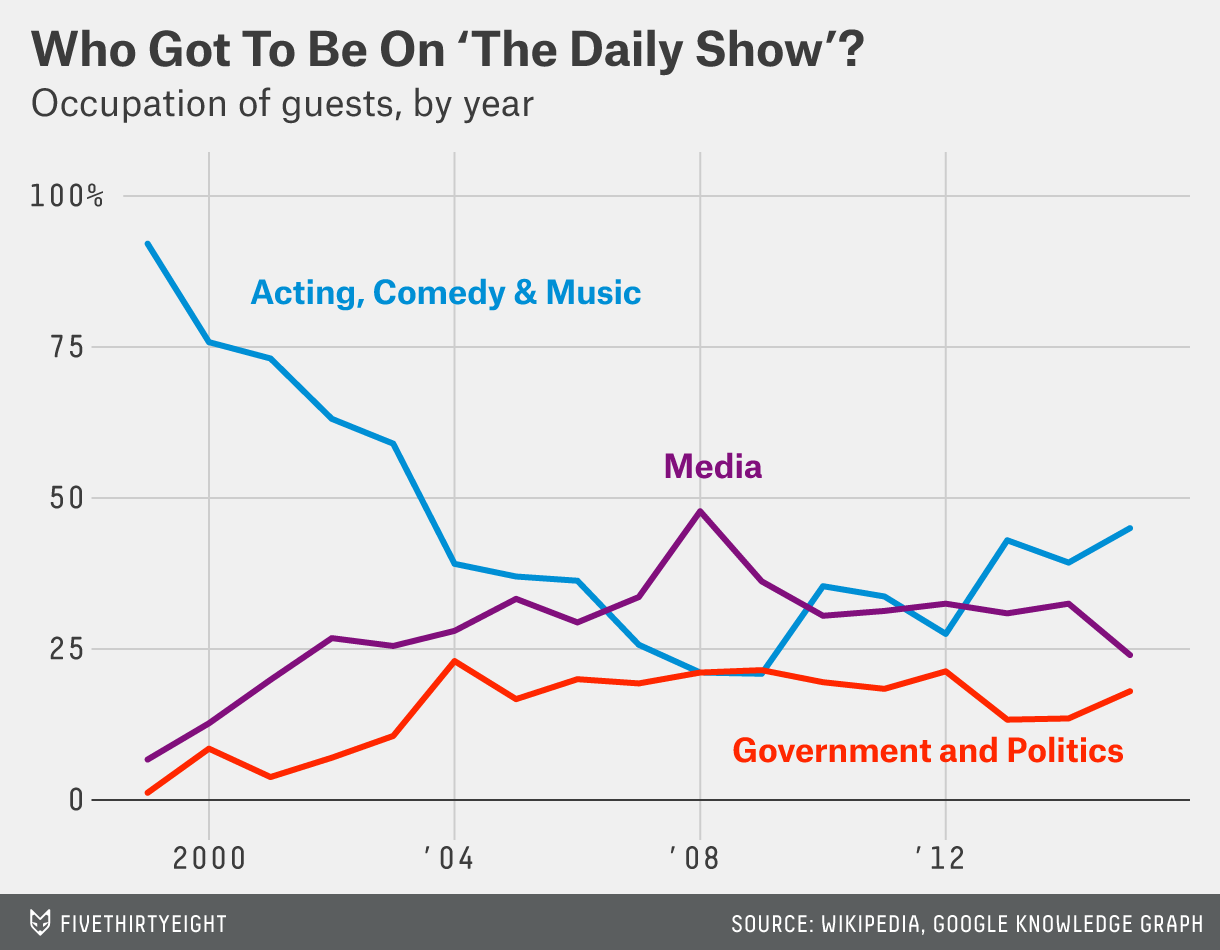

In [0]:
from IPython.display import display, Image
url = 'https://fivethirtyeight.com/wp-content/uploads/2015/08/hickey-datalab-dailyshow.png'
example = Image(url, width=500)
display(example)

**Hint:** use the crosstab you calculated in part 1!

**Expectations:** Your plot should include:
- 3 lines visualizing "occupation of guests, by year." The shapes of the lines should look roughly identical to 538's example. Each line should be a different color. (But you don't need to use the _same_ colors as 538.)
- Legend or labels for the lines. (But you don't need each label positioned next to its line or colored like 538.)
- Title in the upper left: _"Who Got To Be On 'The Daily Show'?"_ with more visual emphasis than the subtitle. (Bolder and/or larger font.)
- Subtitle underneath the title: _"Occupation of guests, by year"_

Any visual element not specifically mentioned in the expectations is an optional bonus, but it's _not_ required to pass the Sprint Challenge.






In [38]:
ct.columns

Index(['Acting, Comedy & Music', 'Government and Politics', 'Media', 'Other'], dtype='object', name='Occupation')

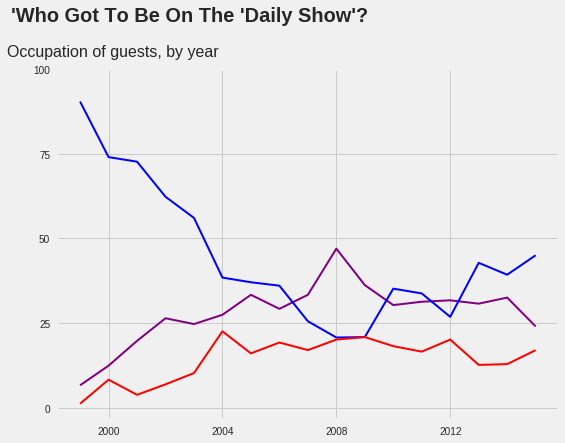

In [39]:
plt.style.use('fivethirtyeight');

fig, ax = plt.subplots(figsize=(8,6))

plt.plot(ct['Media']*100, linewidth=2, color='purple');
plt.plot(ct['Acting, Comedy & Music']*100, linewidth=2, color='blue');
plt.plot(ct['Government and Politics']*100, linewidth=2, color='red');

ax.set(yticks=range(0, 101, 25),xticks = range (2000, 2015, 4) );
#plt.xticks(['2000', '2004', '2008', '2012'],['2000','04','08','12']);


fig.suptitle("'Who Got To Be On The 'Daily Show'?",
            fontsize=20, weight='semibold', horizontalalignment='left', 
             x=0, y=1.025);
ax.set_title('Occupation of guests, by year',
            horizontalalignment='left', x=-.1, y=1.020, fontsize=16);


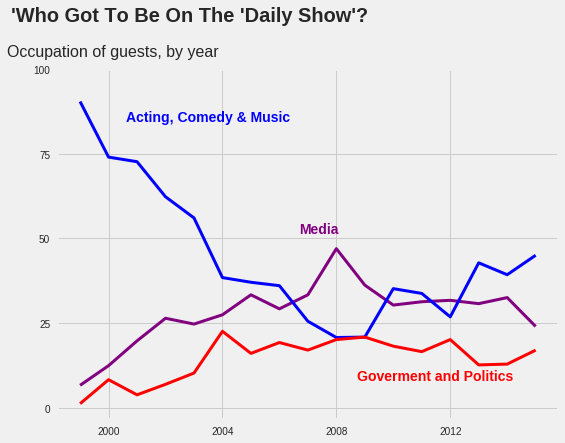

In [61]:
plt.style.use('fivethirtyeight');

fig, ax = plt.subplots(figsize=(8,6))

plt.plot(ct['Media']*100, linewidth=3, color='purple');
fig.text(0.5, .50, "Media", size='medium', color='purple',
        weight='semibold');

plt.plot(ct['Acting, Comedy & Music']*100, linewidth=3, color='blue');
fig.text(0.2,0.76, "Acting, Comedy & Music", size='medium', color='blue',
        weight='semibold');

plt.plot(ct['Government and Politics']*100, linewidth=3, color='red');
fig.text(0.6,0.16, "Goverment and Politics", size='medium', color='red',
        weight='semibold');

ax.set(yticks=range(0, 101, 25),xticks = range (2000, 2015, 4) );
#plt.xticks(['2000', '2004', '2008', '2012'],['2000','04','08','12']);


fig.suptitle("'Who Got To Be On The 'Daily Show'?",
            fontsize=20, weight='semibold', horizontalalignment='left', 
             x=0, y=1.025);
ax.set_title('Occupation of guests, by year',
            horizontalalignment='left', x=-.1, y=1.020, fontsize=16);

# Part 3 — Who were the top 10 guests on _The Daily Show_?

**Make a plot** that shows their names and number of appearances.

**Hint:** you can use the pandas `value_counts` method.

**Expectations:** This can be a simple, quick plot: exploratory, not explanatory. 

If you want, you can add titles and change aesthetics, but it's _not_ required to pass the Sprint Challenge.

In [5]:
df.Guest.value_counts()

Fareed Zakaria                                  19
Denis Leary                                     17
Brian Williams                                  16
Paul Rudd                                       13
Ricky Gervais                                   13
Tom Brokaw                                      12
Bill O'Reilly                                   10
Reza Aslan                                      10
Will Ferrell                                    10
Richard Lewis                                   10
Sarah Vowell                                     9
Adam Sandler                                     8
Maggie Gyllenhaal                                8
Louis C.K.                                       8
Ben Affleck                                      8
Mike Huckabee                                    8
Doris Kearns Goodwin                             7
Samuel L. Jackson                                7
Colin Firth                                      7
Jeff Garlin                    

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


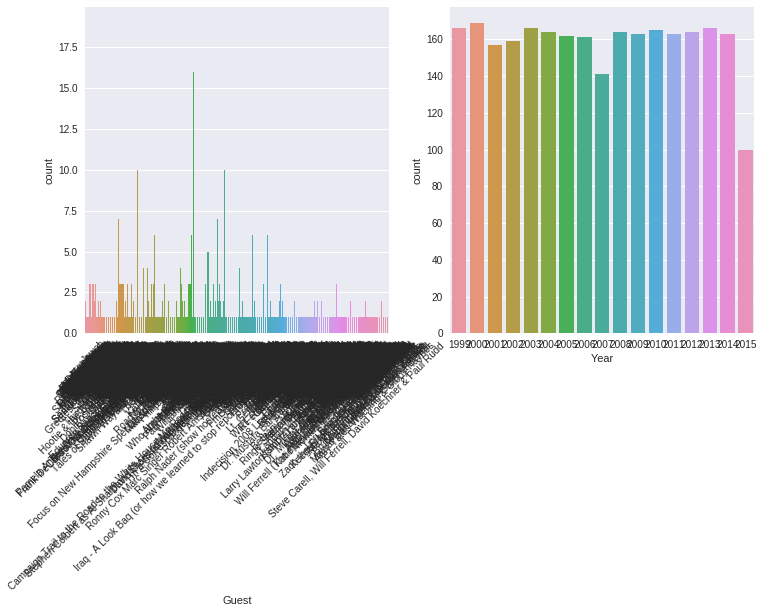

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
fig, axes = plt.subplots(ncols=2,figsize=(12,6))
g = sns.countplot(df["Guest"], ax=axes[0])
plt.setp(g.get_xticklabels(), rotation=45)
g = sns.countplot(df["Year"], ax=axes[1]);


In [0]:
x = df.Guest.value_counts()

In [19]:
type(x)

pandas.core.series.Series

In [0]:
y= x.iloc[0:10]

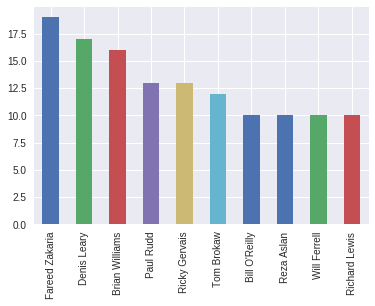

In [31]:
y.plot.bar()

In [0]:
dir(x)